In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
sales = pd.read_csv('sales.csv')

In [3]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26-11-2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26-11-2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23-03-2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23-03-2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15-05-2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


### <font color=green> Rows & Columns 

In [4]:
sales['Country'].unique()

array(['Canada', 'Australia', 'United States', 'Germany', 'France',
       'United Kingdom'], dtype=object)

In [5]:
sales.shape

(113036, 18)

In [6]:
sales.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

### <font color=green> Data Processing

**Identify Type of Columns**

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

**<font color=green> Convert date**

**Convert Object into dateTime Category**

In [8]:
sales['Date'] = pd.to_datetime(sales['Date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_23252\711717623.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sales['Date'] = pd.to_datetime(sales['Date'])


**Change the Date Format**

In [9]:
sales['Calculated_Date'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)
sales['Caculated_Date'] = pd.to_datetime(sales['Calculated_Date'])
sales['Calculated_Date'].head()

C:\Users\HP\AppData\Local\Temp\ipykernel_23252\2982320221.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sales['Calculated_Date'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)


0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

In [10]:
sales.describe()

,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Caculated_Date
count,113036,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036
mean,2014-11-23 12:14:55.063519232,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360,2014-11-23 12:14:55.063519232
min,2011-01-01 00:00:00,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000,2011-01-01 00:00:00
25%,2013-12-22 00:00:00,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000,2013-12-22 00:00:00
50%,2014-06-27 00:00:00,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000,2014-06-27 00:00:00
75%,2016-01-09 00:00:00,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000,2016-01-09 00:00:00
max,2016-07-31 00:00:00,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000,2016-07-31 00:00:00
std,NaN,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674,NaN


### <font color=green> Numerical analysis and visualization

*We'll analyze the Numerical features column:*

In [11]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [12]:
sales['Unit_Cost'].mean()

267.296365759581

In [13]:
sales['Unit_Cost'].median()

9.0

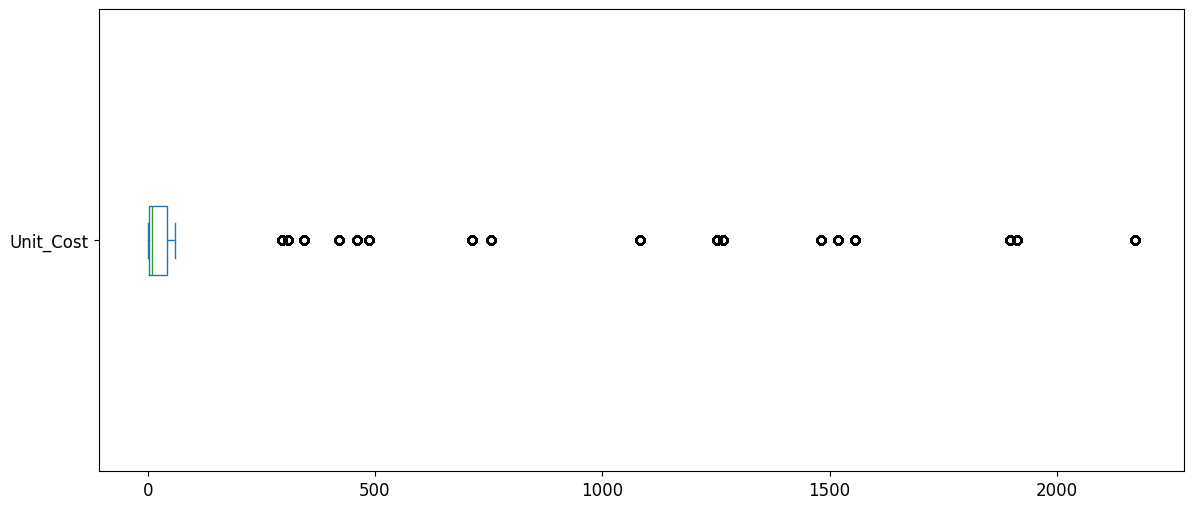

In [14]:
sales['Unit_Cost'].plot(kind="box", figsize=(14,6), vert=False, fontsize=12);

Text(0, 0.5, 'Sales')

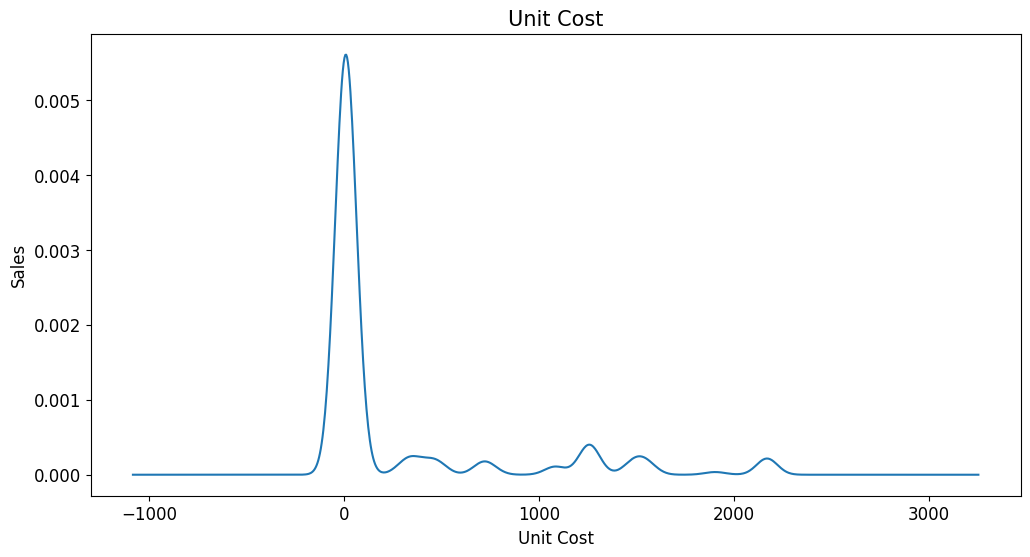

In [15]:
sales['Unit_Cost'].plot(kind="density", figsize=(12,6), fontsize=12)
plt.title("Unit Cost", fontsize=15)
plt.xlabel("Unit Cost", fontsize=12)
plt.ylabel("Sales", fontsize=12)

### <font color=green> Median and Mean at Unit Cost

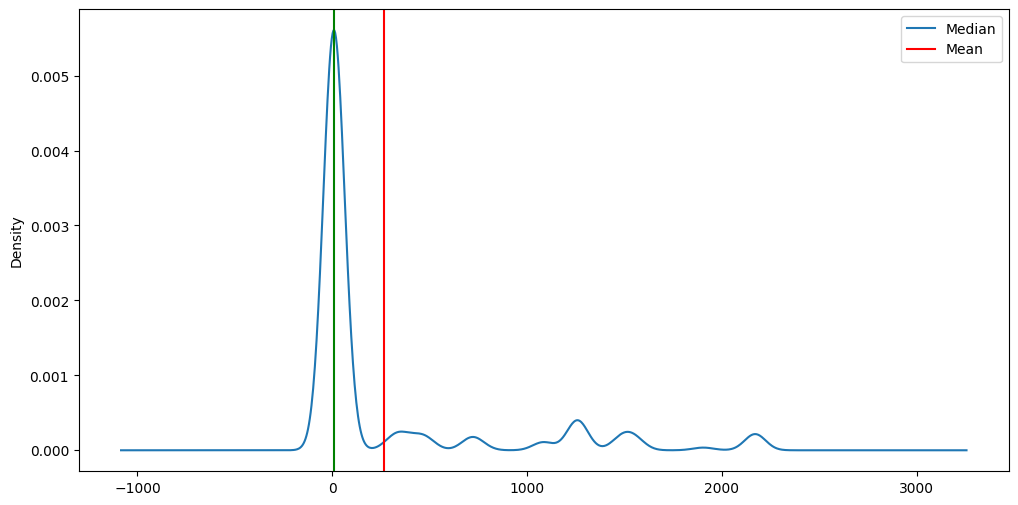

In [16]:
ax=sales['Unit_Cost'].plot(kind="density", figsize=(12,6))
# ax.axvlimes(sales['Unit_Cost'].mean()
mean = ax.axvline(sales['Unit_Cost'].mean(), color = 'red')
median = ax.axvline(sales['Unit_Cost'].median(), color = 'g')
plt.legend({'Median' : median, 'Mean' :mean})

Text(0.5, 0, 'Dollars')

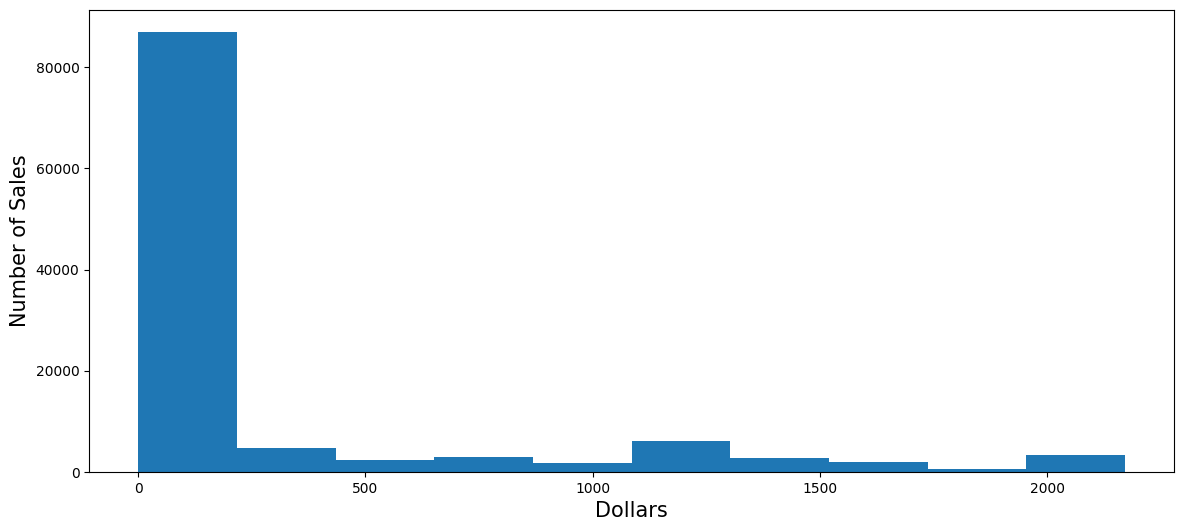

In [18]:
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales', fontsize=15)
ax.set_xlabel('Dollars', fontsize=15)

### <font color=green> Mean of Customers Age 

In [19]:
sales['Customer_Age'].value_counts().mean()

1614.8

<Axes: >

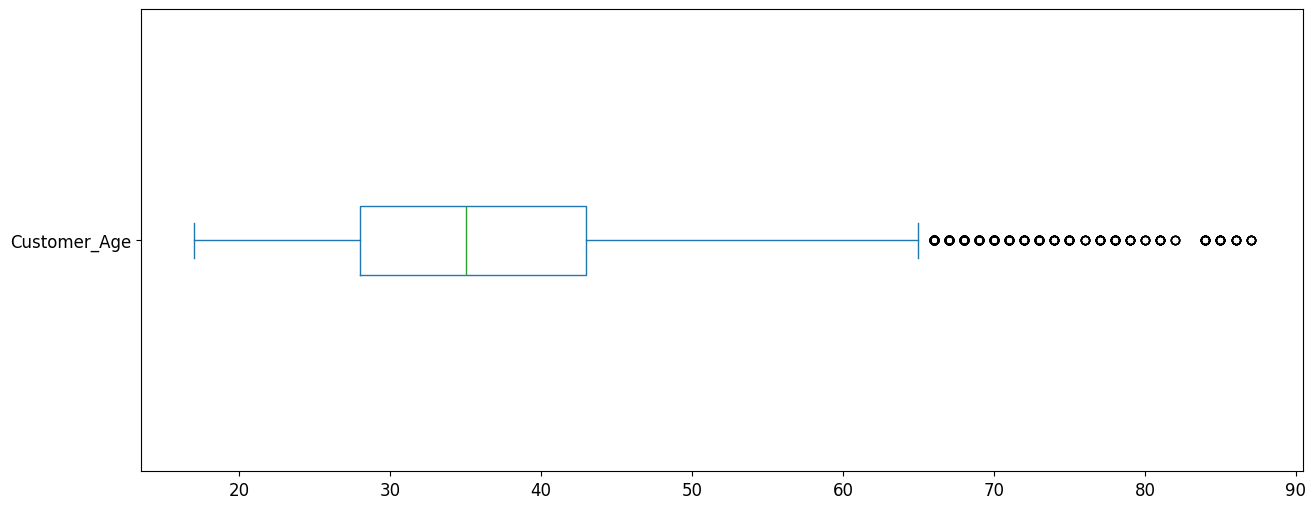

In [20]:
sales['Customer_Age'].plot(kind='box', vert=False, figsize=(15,6), fontsize=12)

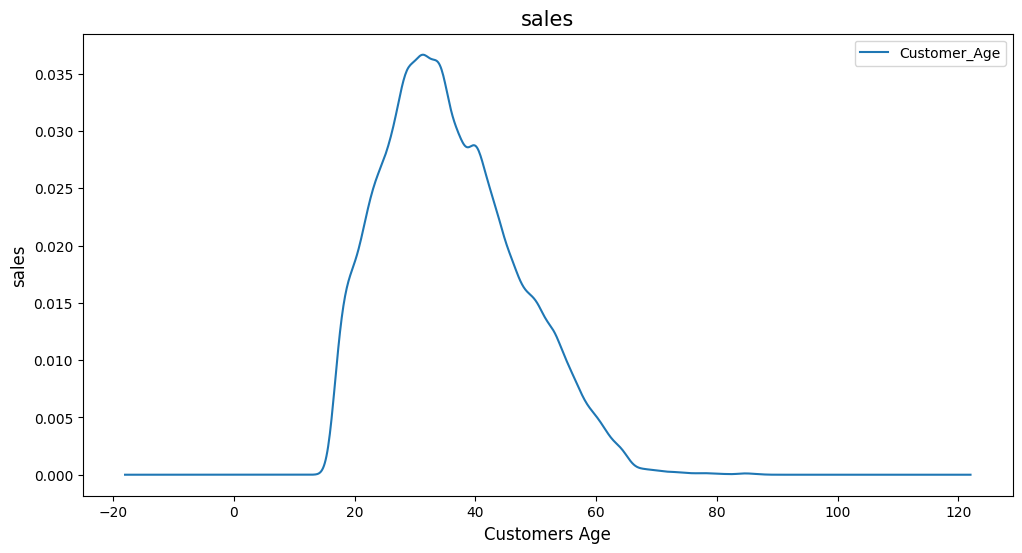

In [21]:
sales['Customer_Age'].plot(kind='kde', figsize=(12,6))
plt.title('sales', fontsize=15)
plt.xlabel('Customers Age', fontsize=12)
plt.ylabel('sales', fontsize=12)
plt.legend()

### <font color=green> Sales According to years

In [22]:
sales['Year'].value_counts()

Year
2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: count, dtype: int64

<Axes: xlabel='Year'>

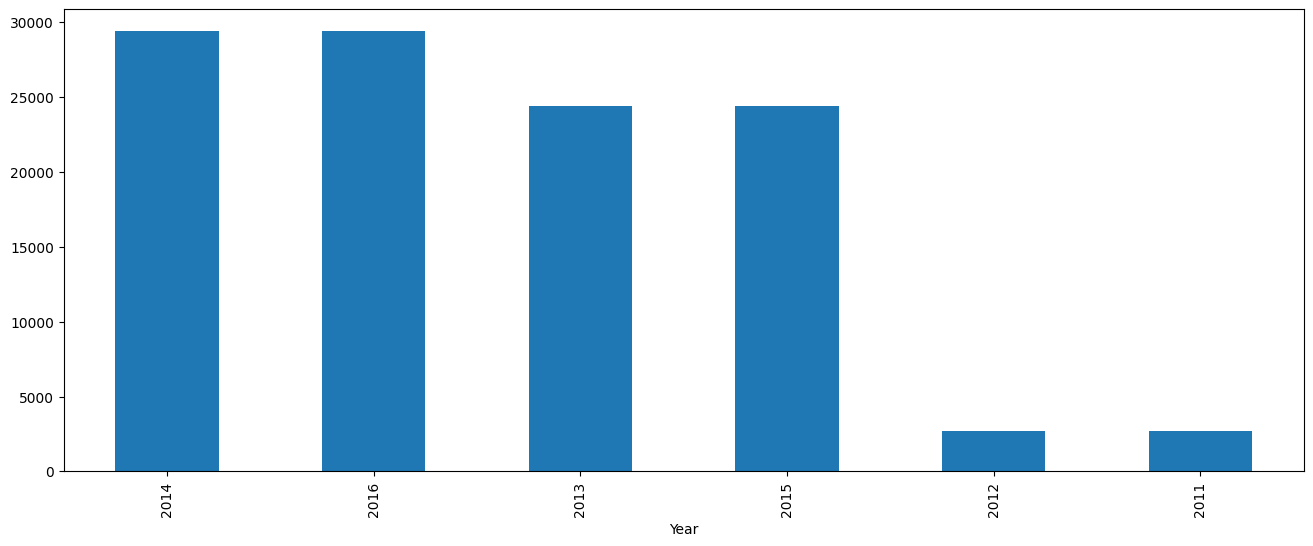

In [23]:
sales['Year'].value_counts().plot(kind='bar', figsize=(16,6))

### <font color=green> Sales According to Month

In [24]:
sales['Month'].value_counts()

Month
June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: count, dtype: int64

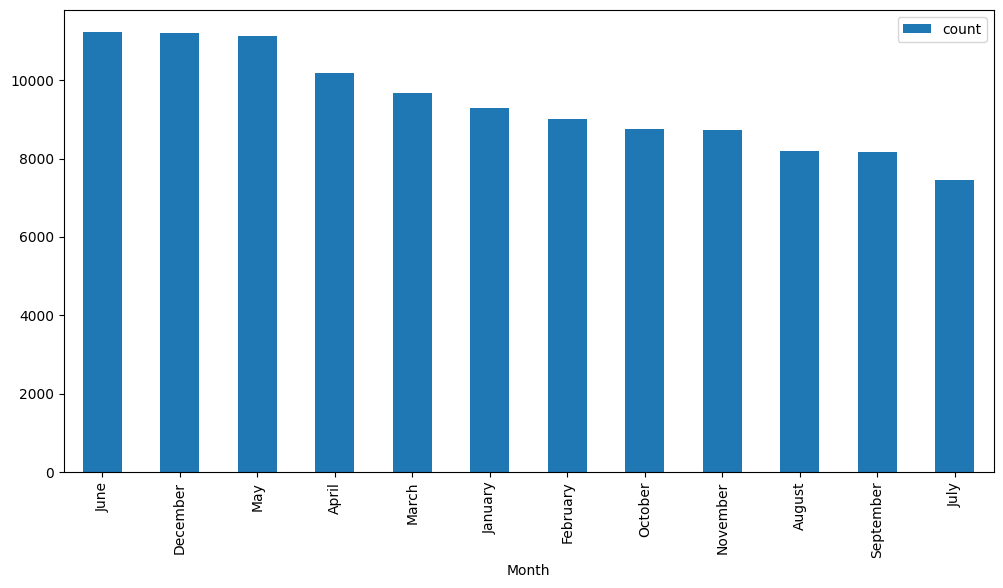

In [25]:
sales['Month'].value_counts().plot(kind='bar', figsize=(12,6))
plt.legend()

### <font color=green> Sales evolve through the years 

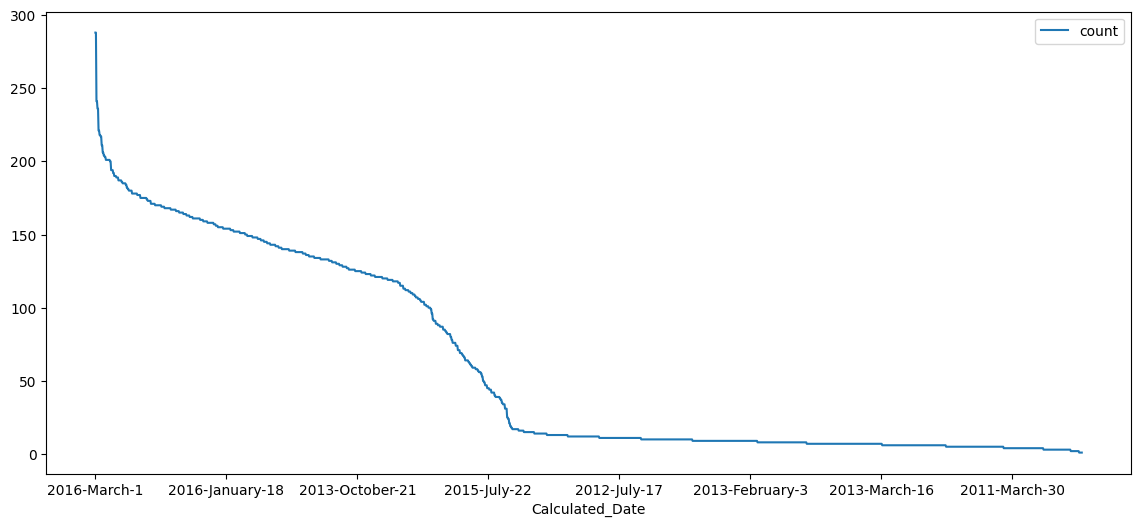

In [26]:
sales['Calculated_Date'].value_counts().plot(kind='line', figsize=(14,6))
plt.legend()

### <font color=green> Increase 50 Udollar'S revenue to every sale

In [27]:
sales['Revenue']+50

0         1000
1         1000
2         2451
3         2138
4          468
          ... 
113031     234
113032    1233
113033    1233
113034    1310
113035    1257
Name: Revenue, Length: 113036, dtype: int64

### <font color=green> Categorical Analysis and Visualization

*We'll analyze the categorical features column*

### <font color=green> Sales According to Age Group

In [28]:
sales['Age_Group'].value_counts()

Age_Group
Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: count, dtype: int64

Text(0.5, 0, 'Age')

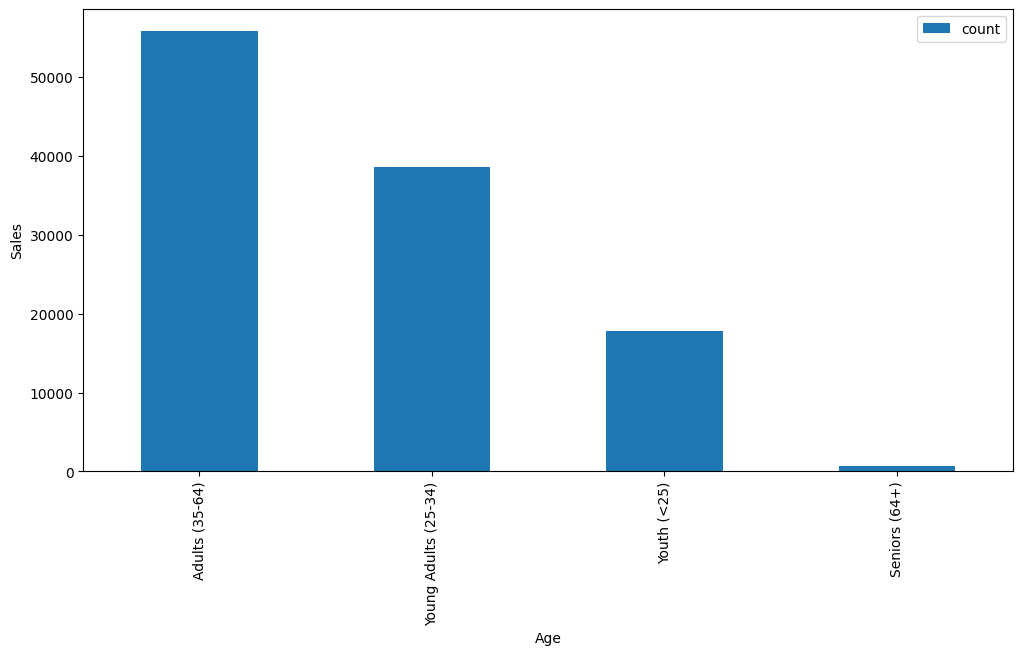

In [29]:
sales['Age_Group'].value_counts().plot(kind='bar', figsize=(12,6))
plt.legend()
plt.legend()
plt.ylabel('Sales')
plt.xlabel('Age')

Text(0.5, 1.0, 'Age Group')

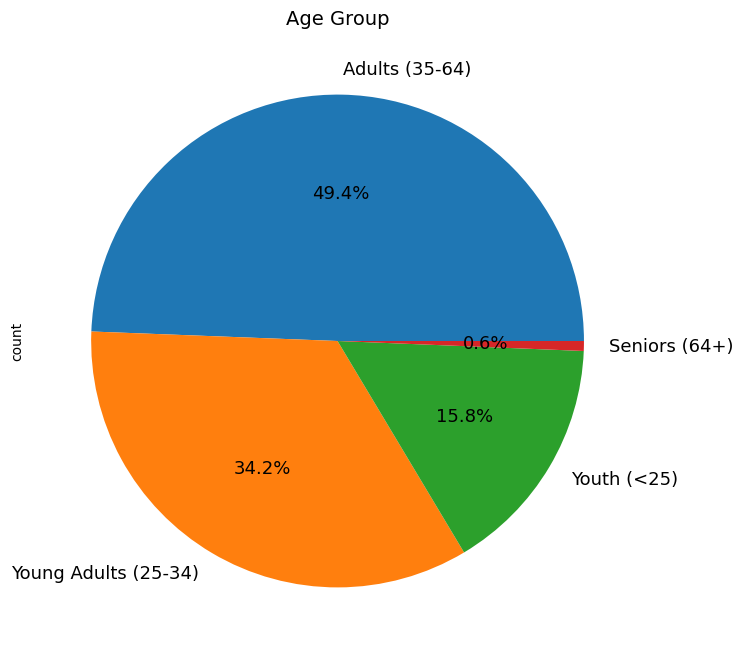

In [30]:
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(14,8),
autopct='%1.1f%%', fontsize=13)
plt.title('Age Group', fontsize=14)

### <font color=green> Mean of Sales order 

In [31]:
sales['Order_Quantity'].mean()

11.901659648253654

Text(0.5, 1.0, 'Order Quality')

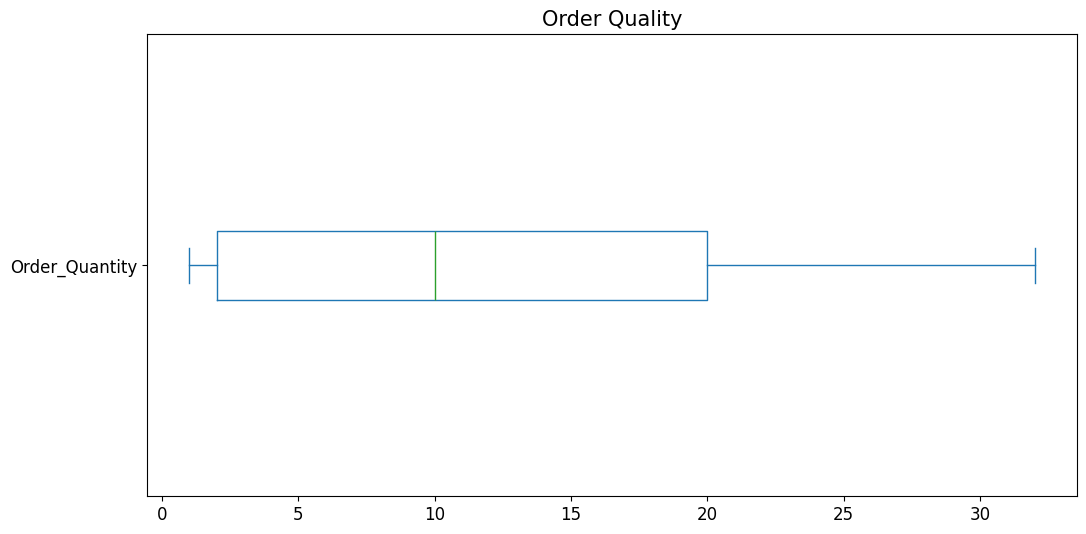

In [32]:
sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(12,6), fontsize=12)
plt.title('Order Quality', fontsize=15)

### <font color=green> Sales According to Country

In [33]:
sales['Country'].value_counts()

Country
United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: count, dtype: int64

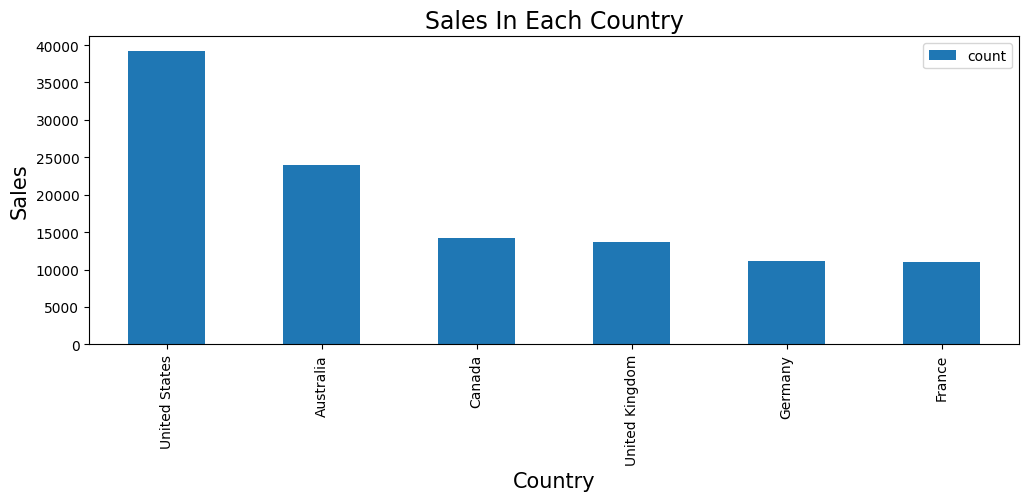

In [34]:
sales['Country'].value_counts().plot(kind='bar', figsize=(12,4))
plt.title('Sales In Each Country', fontsize=17)
plt.ylabel('Sales', fontsize=15)
plt.xlabel('Country', fontsize=15)
plt.legend()

### <font color=green> List of every product sold

In [35]:
MostSales = sales.loc[: , 'Product'].unique()

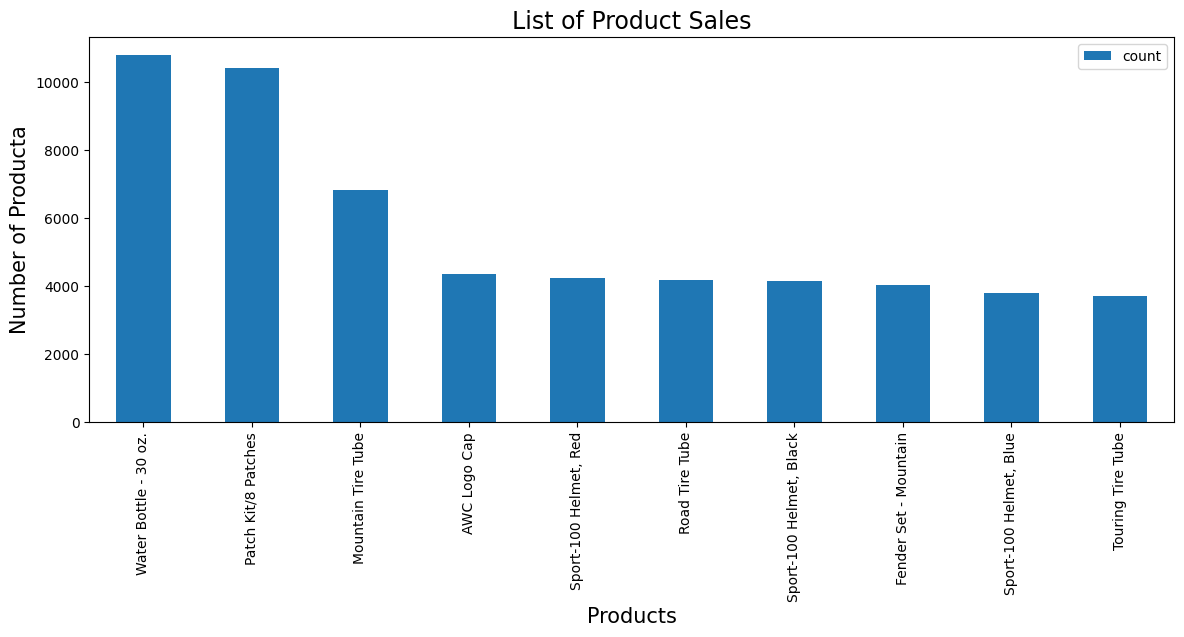

In [36]:
sales.loc[: , 'Product'].value_counts().head(10).plot(kind='bar', figsize=(14,5))
plt.title('List of Product Sales', fontsize=17)
plt.ylabel('Number of Producta', fontsize=15)
plt.xlabel('Products', fontsize=15)
plt.legend()

### <font color=green> Relation between Unit Cost & Unit Price

Text(0.5, 0, 'Unit Cost')

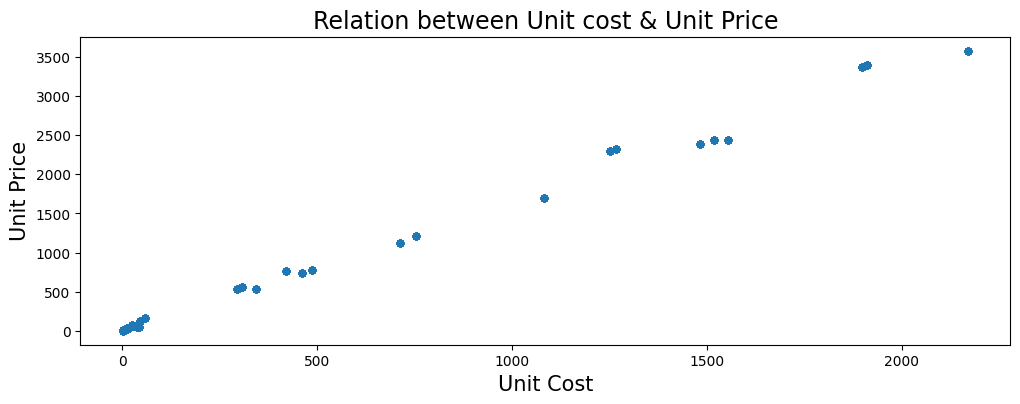

In [37]:
sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(12,4), fontsize=10)
plt.title('Relation between Unit cost & Unit Price', fontsize=17)
plt.ylabel('Unit Price', fontsize=15)
plt.xlabel('Unit Cost', fontsize=15)

### <font color=green> Relation between Order Quantity & Profit

Text(0.5, 1.0, 'Relation Between Order Quantity & Profit')

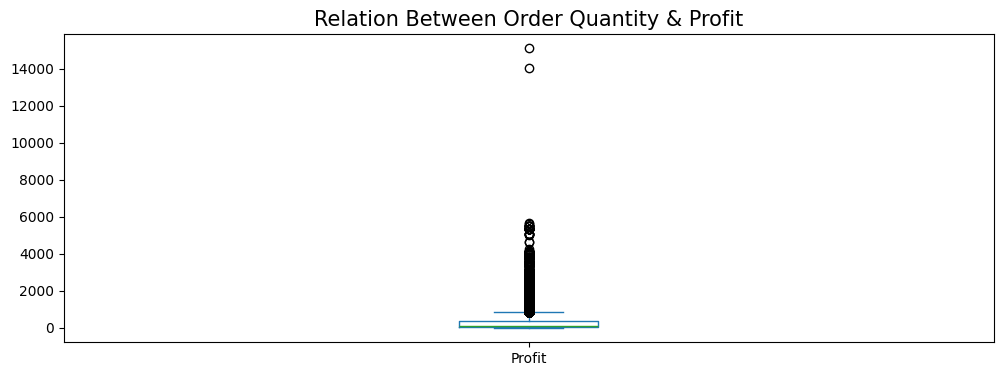

In [38]:
sales.plot(kind='box', x='Order_Quantity', y='Profit', figsize=(12,4), fontsize=10)
plt.title('Relation Between Order Quantity & Profit', fontsize=15)

### <font color=green> Relation between Country & Unit Profit

Text(0.5, 1.0, 'Relation between Country & Unit Profit')

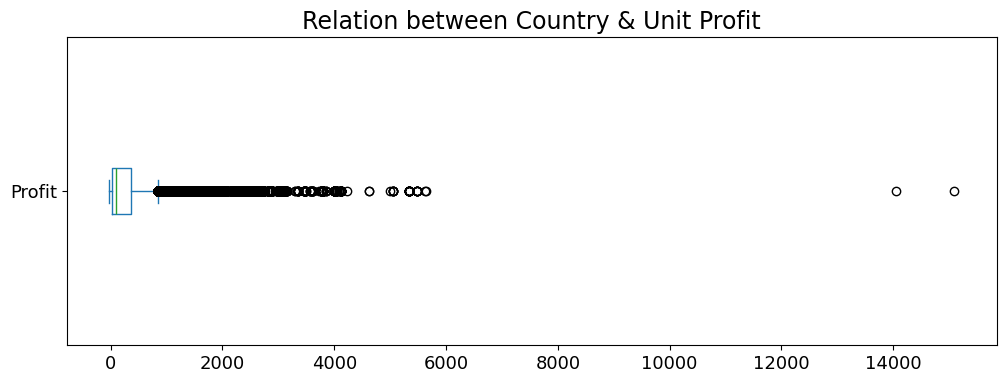

In [39]:
sales.plot(kind='box', x='Country', y='Profit', figsize=(12,4), fontsize=13, vert=False)
plt.title('Relation between Country & Unit Profit', fontsize=17)

### <font color=green> Customer Age According to Country

<Axes: title={'center': 'Customer_Age'}, xlabel='[Country]'>

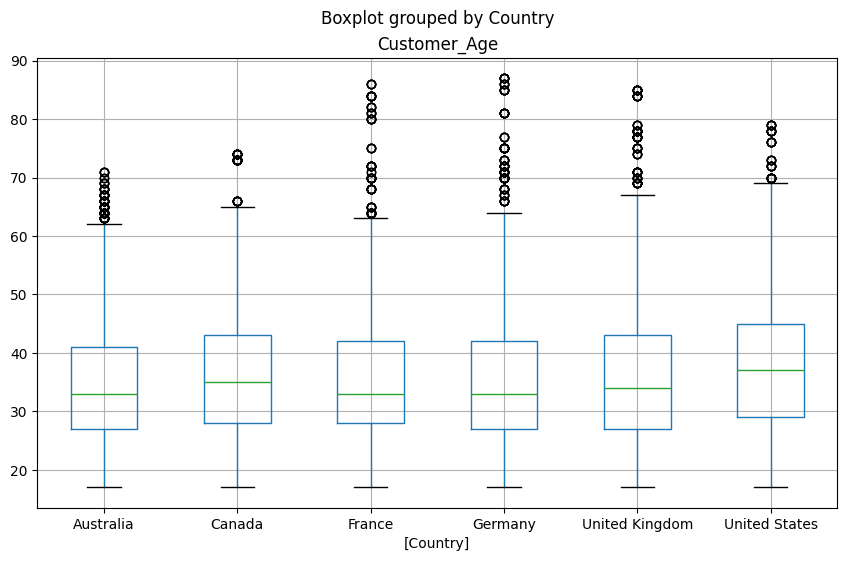

In [40]:
sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(10,6))

**<font color=green> How many orders were made in Canada or France?**

In [41]:
sales.loc[((sales['Country']=='Canada') | (sales['Country']=='France'))].shape[0]

25176

**<font color=green> How many Bike Racks orders were made from Canada?**

In [42]:
sales.loc[(sales['Country']=='Canada') & (sales['Sub_Category']=='Bike Racks')].shape[0]

104

**<font color=green> Sales in Each State of France**

In [43]:
sales.loc[sales['Country']=='France', 'State'].value_counts()

State
Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: count, dtype: int64

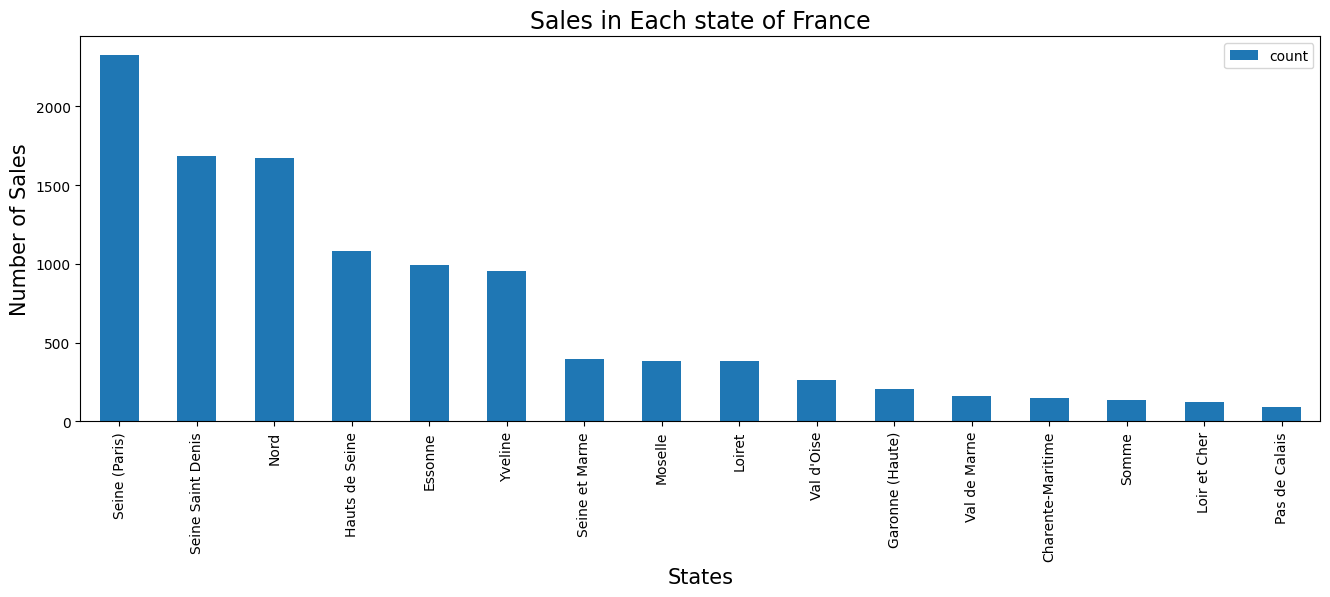

In [44]:
sales.loc[sales['Country']=='France', 'State'].value_counts().plot(kind='bar', figsize=(16,5))
plt.title('Sales in Each state of France', fontsize=17)
plt.ylabel('Number of Sales', fontsize=15)
plt.xlabel('States', fontsize=15)
plt.legend()

plt.legend()

**<font color=green> How many sales were made per category?**

In [45]:
sales['Sub_Category'].value_counts()

Sub_Category
Tires and Tubes      33870
Bottles and Cages    15876
Road Bikes           13430
Helmets              12158
Mountain Bikes        8854
Jerseys               6010
Caps                  4358
Fenders               4032
Touring Bikes         3698
Gloves                2686
Cleaners              1802
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             592
Bike Stands            456
Name: count, dtype: int64

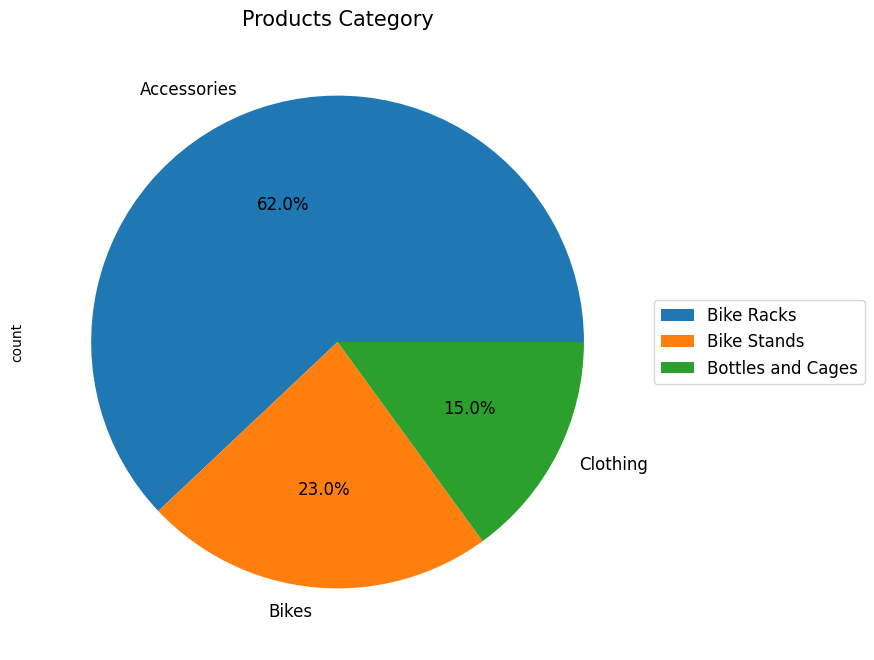

In [47]:
sales['Product_Category'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', fontsize=12)
cat=sales['Sub_Category'].unique()
plt.title('Products Category', fontsize=15)
plt.legend(cat, fontsize=12, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

In [48]:
sales['Sub_Category'].value_counts()

Sub_Category
Tires and Tubes      33870
Bottles and Cages    15876
Road Bikes           13430
Helmets              12158
Mountain Bikes        8854
Jerseys               6010
Caps                  4358
Fenders               4032
Touring Bikes         3698
Gloves                2686
Cleaners              1802
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             592
Bike Stands            456
Name: count, dtype: int64

In [49]:
sales.loc[sales['Product_Category']=='Accessories', 'Sub_Category'].value_counts()

Sub_Category
Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: count, dtype: int64

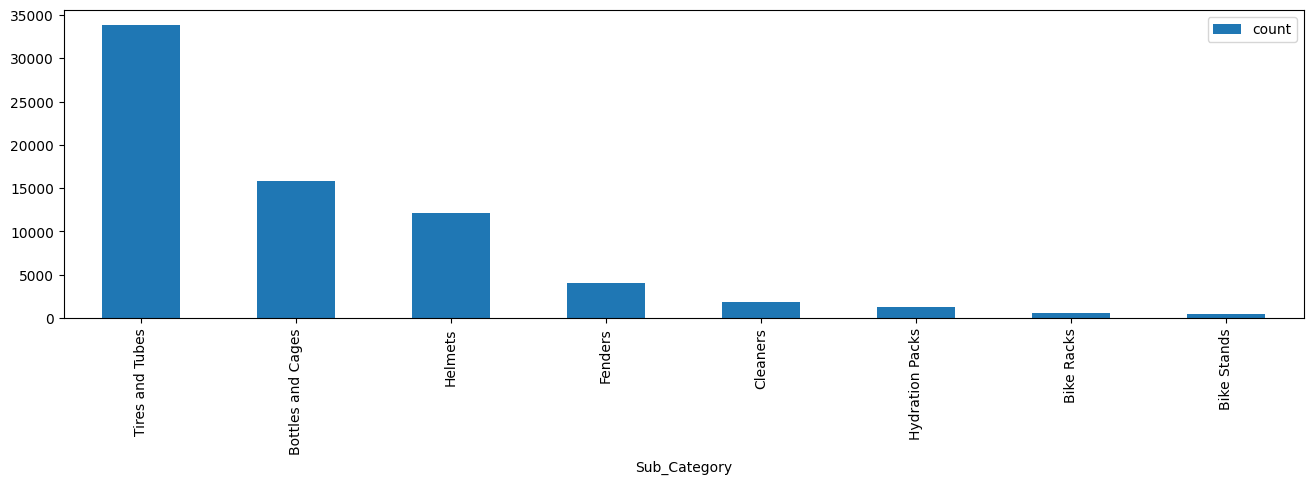

In [50]:
sales.loc[sales['Product_Category']=='Accessories', 'Sub_Category'].value_counts().plot(kind='bar', figsize=(16,4))
plt.legend()

In [51]:
sales.loc[sales['Product_Category']=='Bikes', 'Sub_Category'].value_counts()

Sub_Category
Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
Name: count, dtype: int64

Text(0.5, 1.0, 'Products Category in Bikes')

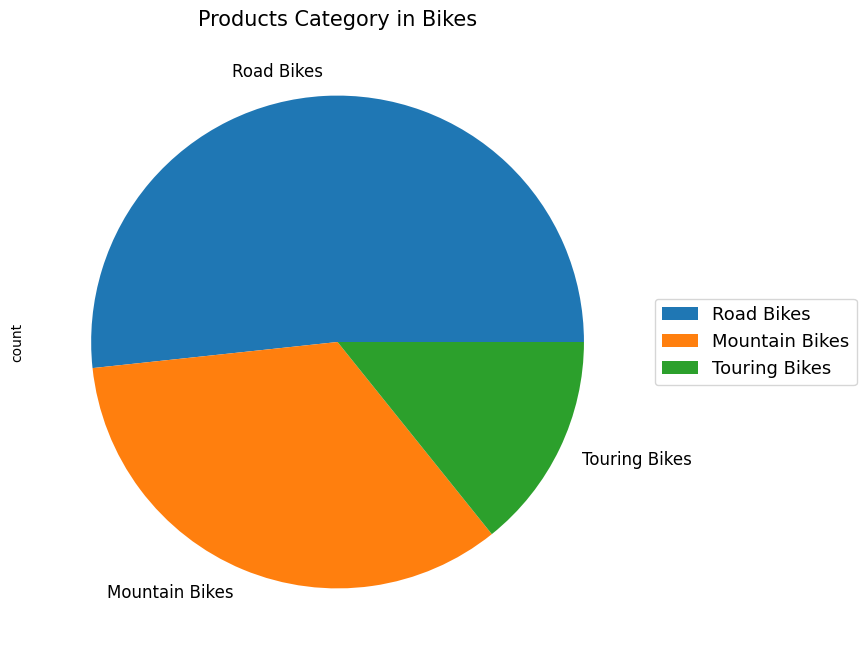

In [53]:
Pc=sales.loc[sales['Product_Category']=='Bikes', 'Sub_Category'].unique()
sales.loc[sales['Product_Category']=='Bikes', 'Sub_Category'].value_counts().plot(kind='pie', figsize=(8,8), fontsize=12)
plt.legend(fontsize=13, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Products Category in Bikes', fontsize=15)

#### <font color=green> Which gender has the most amount of sales?

In [54]:
sales['Customer_Gender'].value_counts()

Customer_Gender
M    58312
F    54724
Name: count, dtype: int64

Text(0, 0.5, 'Sales')

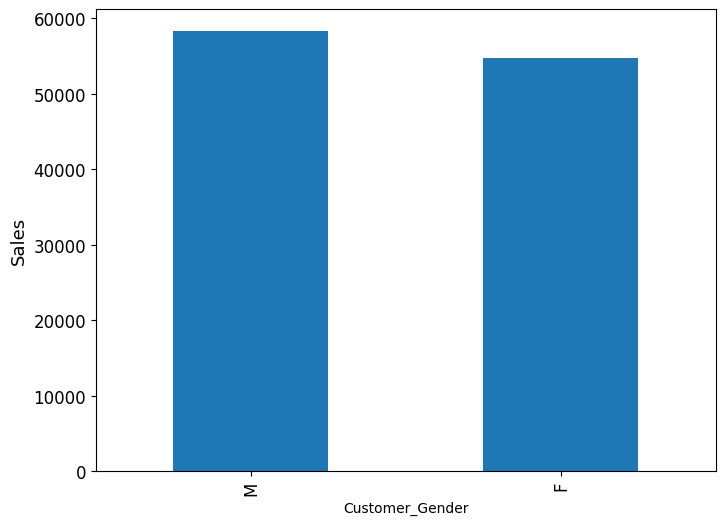

In [56]:
sales['Customer_Gender'].value_counts().plot(kind='bar', fontsize=12, figsize=(8,6))
plt.ylabel('Sales', fontsize=13)

#### <font color=green> How many sales with more than 500 in Revenue were made by men?

In [57]:
sales.loc[(sales['Customer_Gender']=='M') & (sales['Revenue']>=500)].shape[0]

21781

#### <font color=green> Get the top-5 sales with the highest revenue

In [59]:
sales.sort_values(['Revenue'],ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date,Caculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58074,2015-July-24,2015-07-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54069,2013-July-24,2013-07-24
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14312,2011-July-8,2011-07-08
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14169,2011-April-30,2011-04-30
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14169,2011-September-30,2011-09-30


#### <font color=green> Get the sale with the hid=ghest revenue

In [60]:
sales['Revenue'].max()

58074

#### <font color=green> What is the mean Order Quantity of orders with more than 10K in revenue?

In [61]:
sales.loc[sales['Revenue']>10_000, 'Order_Quantity'].mean()

3.7218934911242605

#### <font color=green> What is the mean Order Quantity with less than 10K in revenue?

In [62]:
sales.loc[sales['Revenue']<10_000, 'Order_Quantity'].mean()

11.913907519469818

#### <font color=green> How many orders were made in May,June,July of 2016? 

In [63]:
sales.loc[(sales['Year']==2016) & (sales['Month'].isin(['May', 'June', 'July']))].shape[0]

12164

<Axes: title={'center': 'Profit'}, xlabel='[Month]'>

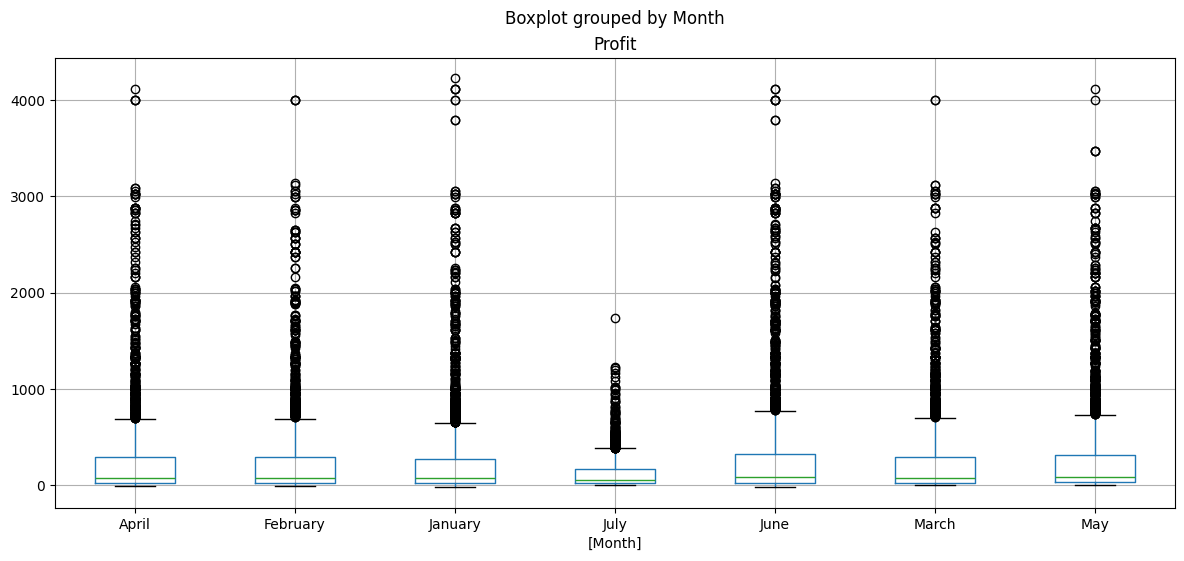

In [64]:
sales2016=sales.loc[sales['Year']==2016, ['Profit', 'Month']]
sales2016.boxplot(by='Month', figsize=(14,6))

#### <font color=green> 10% tax on Sales in USA

In [65]:
sales.loc[sales['Country']=='United State', 'Unit_Price']*=1.072

In [66]:
sales['Unit_Price'].head(2)

0    120
1    120
Name: Unit_Price, dtype: int64

#### <font color=green> Customer Revenue accordong to age

<Figure size 1600x800 with 0 Axes>

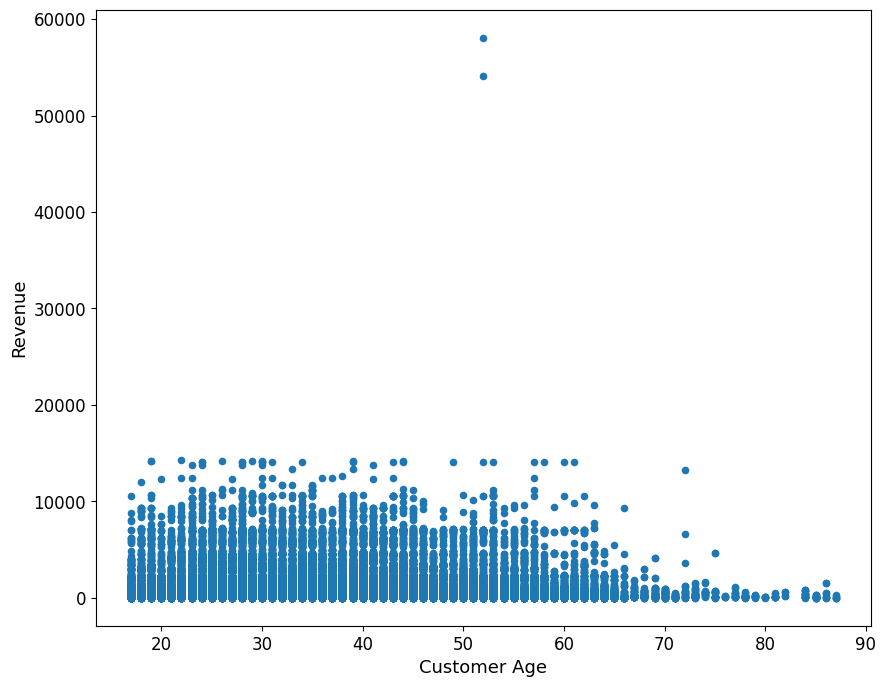

In [69]:
plt.figure(figsize=(16,8))
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(10,8), fontsize=12)
plt.xlabel('Customer Age', fontsize=13)
plt.ylabel('Revenue', fontsize=13)
plt.show()

#### <font color=green> Customer Revenue with profit

Text(0, 0.5, 'Profit')

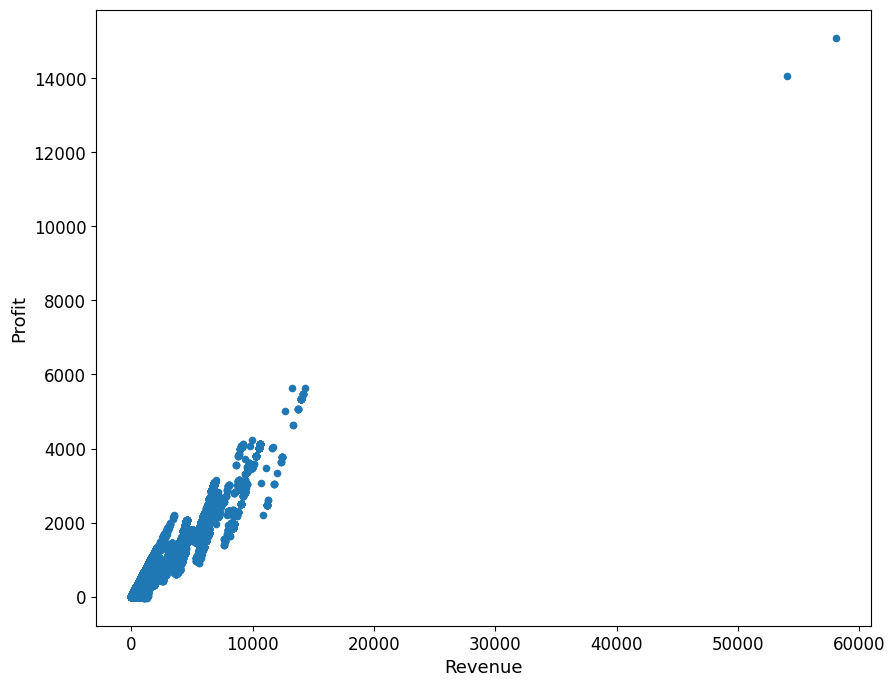

In [70]:
sales.plot(kind='scatter', x='Revenue', y='Profit', figsize=(10,8), fontsize=12)
plt.xlabel('Revenue', fontsize=13)
plt.ylabel('Profit', fontsize=13)

#### <font color=green> Add and Calculate a new Revenue per Age column

In [71]:
sales['Revenue_Per_Age'] = sales['Revenue']/sales['Customer_Age']

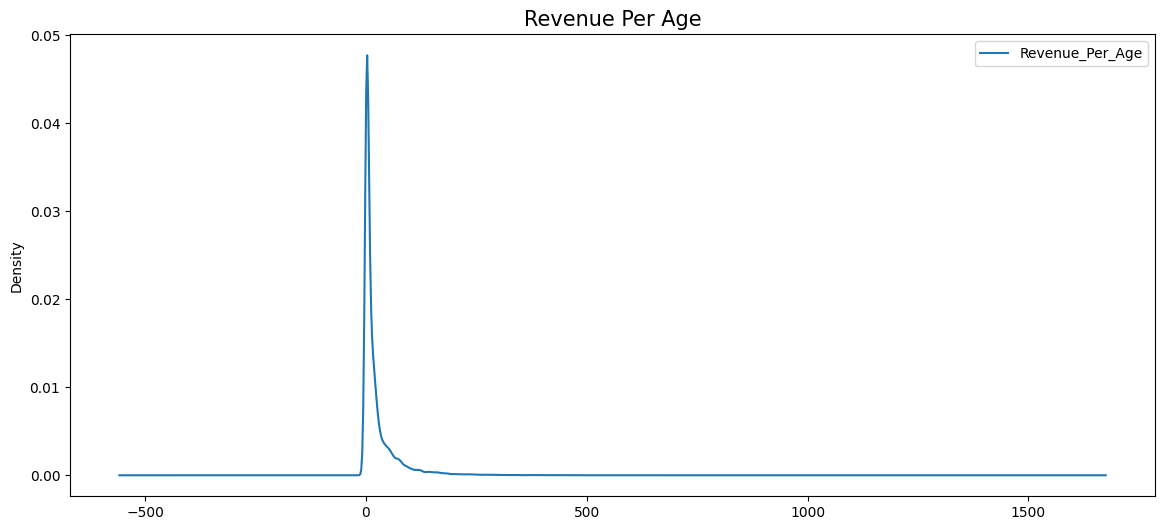

In [72]:
sales['Revenue_Per_Age'].plot(kind='density', figsize=(14,6))
plt.title('Revenue Per Age', fontsize=15)
plt.legend()

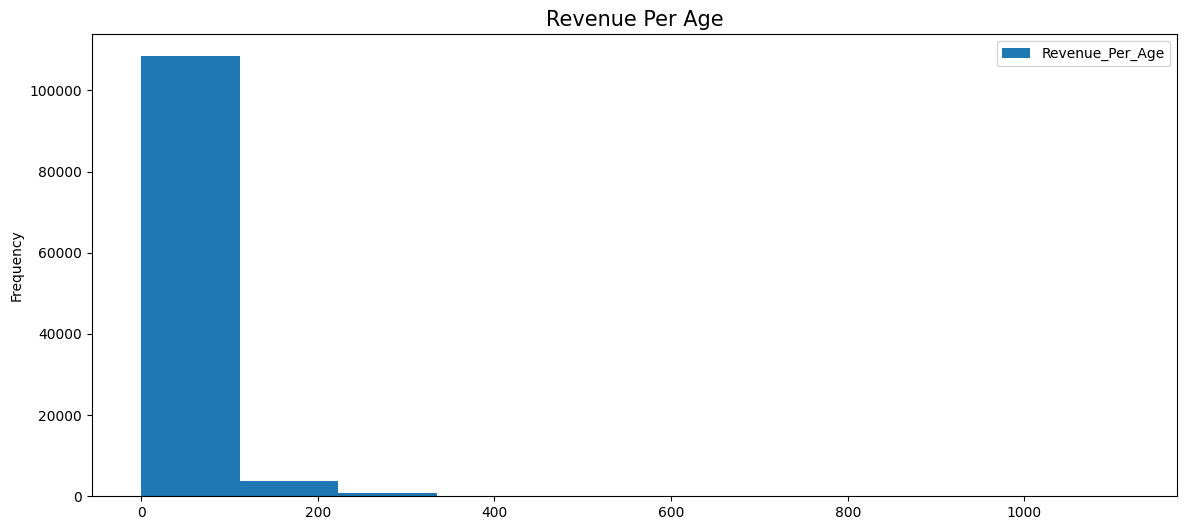

In [73]:
sales['Revenue_Per_Age'].plot(kind='hist', figsize=(14,6))
plt.title('Revenue Per Age', fontsize=15)
plt.legend()

#### <font color=green> Get all the sales made in the state of Kentucky

In [74]:
sales.loc[sales['State']=='Kentucky'].head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date,Caculated_Date,Revenue_Per_Age
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,120,63,45,108,2013-November-4,2013-11-04,2.700
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,120,63,45,108,2015-November-4,2015-11-04,2.700
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,12,8,22,142,96,238,2014-April-16,2014-04-16,5.950
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,14,8,22,165,112,277,2016-April-16,2016-04-16,6.925
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",29,13,35,537,377,914,2014-April-16,2014-04-16,22.850


#### <font color=green> Get the mean revenue of the Adults(35-64) sales group

In [76]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

In [78]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] =='Adults (35-64)')].shape[0]

73652